In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d virajbagal/roco-dataset

Dataset URL: https://www.kaggle.com/datasets/virajbagal/roco-dataset
License(s): CC0-1.0
100% 6.18G/6.19G [00:52<00:00, 185MB/s]
100% 6.19G/6.19G [00:52<00:00, 127MB/s]


In [ ]:
!unzip roco-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: all_data/validation/radiology/images/PMC3870636_CRIM.OTOLARYNGOLOGY2013-650428.002.jpg  
  inflating: all_data/validation/radiology/images/PMC3870648_CRIM.DENTISTRY2013-378062.012.jpg  
  inflating: all_data/validation/radiology/images/PMC3871037_enm-28-326-g001.jpg  
  inflating: all_data/validation/radiology/images/PMC3872022_CRIM.MEDICINE2013-653925.001.jpg  
  inflating: all_data/validation/radiology/images/PMC3872161_CRIM.SURGERY2013-209494.001.jpg  
  inflating: all_data/validation/radiology/images/PMC3872390_CRIM.OBGYN2013-906351.001.jpg  
  inflating: all_data/validation/radiology/images/PMC3872571_OJO-6-193-g005.jpg  
  inflating: all_data/validation/radiology/images/PMC3872571_OJO-6-193-g007.jpg  
  inflating: all_data/validation/radiology/images/PMC3872649_SNI-4-150-g001.jpg  
  inflating: all_data/validation/radiology/images/PMC3872649_SNI-4-150-g014.jpg  
  inflating: all_data/validation/radiology/images/PMC38

LSTM Text Generation In Class

In [ ]:
corpus="""
Artificial intelligence is revolutionizing industries worldwide.\n
Machine learning algorithms are enabling advanced data analysis.\n
Deep learning models are inspired by the structure of the human brain.\n
Natural language processing is a key field in AI research.\n
Self-driving cars rely heavily on AI and computer vision.\n
Generative AI is opening new doors in creative industries.\n
Healthcare is being transformed by predictive analytics and AI tools.\n
AI ethics and governance are crucial for responsible development.\n
Edge computing enables AI processing closer to data sources.\n
Reinforcement learning teaches AI through trial and error.\n
The Internet of Things is expanding with the help of AI technologies.\n
AI-powered chatbots are enhancing customer service experiences.\n
Cybersecurity is being strengthened using AI-based threat detection.\n
AI is making significant contributions to climate change research.\n
Robotics and AI are improving automation in manufacturing.\n
Recommendation systems use AI to personalize user experiences.\n
AI-assisted education tools are reshaping how students learn.\n
The combination of AI and blockchain has potential in supply chain transparency.\n
Quantum computing could unlock new capabilities for AI algorithms.\n
AI continues to evolve, influencing almost every aspect of modern life.\n
nnn
"""

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([corpus])
vocab_size=len(tokenizer.word_index)+1
vocab_size

127

In [ ]:
sequences=[]
for line in corpus.split("\n"):
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    ngram_sequence=token_list[:i+1]
    sequences.append(ngram_sequence)
sequences

[[22, 23],
 [22, 23, 2],
 [22, 23, 2, 24],
 [22, 23, 2, 24, 10],
 [22, 23, 2, 24, 10, 25],
 [26, 9],
 [26, 9, 11],
 [26, 9, 11, 3],
 [26, 9, 11, 3, 27],
 [26, 9, 11, 3, 27, 28],
 [26, 9, 11, 3, 27, 28, 12],
 [26, 9, 11, 3, 27, 28, 12, 29],
 [30, 9],
 [30, 9, 31],
 [30, 9, 31, 3],
 [30, 9, 31, 3, 32],
 [30, 9, 31, 3, 32, 13],
 [30, 9, 31, 3, 32, 13, 5],
 [30, 9, 31, 3, 32, 13, 5, 33],
 [30, 9, 31, 3, 32, 13, 5, 33, 6],
 [30, 9, 31, 3, 32, 13, 5, 33, 6, 5],
 [30, 9, 31, 3, 32, 13, 5, 33, 6, 5, 34],
 [30, 9, 31, 3, 32, 13, 5, 33, 6, 5, 34, 35],
 [36, 37],
 [36, 37, 14],
 [36, 37, 14, 2],
 [36, 37, 14, 2, 38],
 [36, 37, 14, 2, 38, 39],
 [36, 37, 14, 2, 38, 39, 40],
 [36, 37, 14, 2, 38, 39, 40, 7],
 [36, 37, 14, 2, 38, 39, 40, 7, 1],
 [36, 37, 14, 2, 38, 39, 40, 7, 1, 15],
 [41, 42],
 [41, 42, 43],
 [41, 42, 43, 44],
 [41, 42, 43, 44, 45],
 [41, 42, 43, 44, 45, 46],
 [41, 42, 43, 44, 45, 46, 1],
 [41, 42, 43, 44, 45, 46, 1, 4],
 [41, 42, 43, 44, 45, 46, 1, 4, 47],
 [41, 42, 43, 44, 45, 46, 

In [ ]:
max_sequence_len=max([len(seq) for seq in sequences])
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences=pad_sequences(sequences,maxlen=max_sequence_len,padding="pre")

array([[  0,   0,   0, ...,   0,  22,  23],
       [  0,   0,   0, ...,  22,  23,   2],
       [  0,   0,   0, ...,  23,   2,  24],
       ...,
       [  0,   0,   0, ..., 123, 124,   6],
       [  0,   0,   1, ..., 124,   6, 125],
       [  0,   1, 119, ...,   6, 125, 126]], dtype=int32)

In [ ]:
from tensorflow.keras.utils import to_categorical
X=sequences[:,:-1]
y=sequences[:,-1]
y=to_categorical(y,num_classes=vocab_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
model=Sequential([
    Embedding(vocab_size,50,input_length=max_sequence_len-1),
    LSTM(100,return_sequences=False),
    Dense(vocab_size,activation="softmax")

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss="categoricaimono09l_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X,y,epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0206 - loss: 4.8434
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0887 - loss: 4.8282 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0680 - loss: 4.8020 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0738 - loss: 4.7323 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0786 - loss: 4.5936 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0844 - loss: 4.5603 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0632 - loss: 4.4518 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0872 - loss: 4.4485 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0660 - loss: 4.4450 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0637 - loss: 4.3987 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0622 - loss: 4.3712 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0894 - los

In [ ]:
import numpy as np
def generate_text(seed_text,next_words,max_sequence_len):
  for _ in range(next_words):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding="pre")
    predicted=np.argmax(model.predict(token_list,verbose=0),axis=-1)
    output_word=""
    for word,index in tokenizer.word_index.items():
      if index==predicted:
        output_word=word
        break
    seed_text+=" "+output_word
  return seed_text

In [ ]:
seed_text="AI is"
generate_text(seed_text,next_words=5,max_sequence_len=max_sequence_len)

'AI is making significant contributions to climate'

FROM HERE ONWARDS WORK DONE BY ME

LSTM- TEXT GNERATION

In [ ]:
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

In [ ]:
file_path = '/content/all_data/train/non-radiology/captions.txt'

with open(file_path, 'r') as file:
    all_captions = file.readlines()

# Take the first 10 captions
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

# Print the selected corpus
print("Selected Corpus:")
for idx, caption in enumerate(corpus, start=1):
    print(f"{idx}: {caption}")

Selected Corpus:
1: ROCO_81826	 Model bone showing the extent of graft insertion
2: ROCO_81828	 Lip-together smile photograph
3: ROCO_81829	 Resection of superficial urothelial tissue to dissect the suture material.
4: ROCO_81830	 External appearance of the neck area revealed tiny pinkish papules.
5: ROCO_81831	 According to Junius and Kuhnt, the first drawing of disciform macular disease as seen in the eye by low magnification after removal of the anterior segment. It was called Choroido-retinitis in the region of the macula lutea. “Between the papilla and macula lutea is a whitish tract which extends downwards, becoming whiter, and terminates in a sharp point.” This atlas was published in English and German.49
6: ROCO_81832	 Significant decrease in size of pneumocephalus (subarachnoid and interventricular) (case 1).
7: ROCO_81833	 A) Gantzer muscle; B) Located posterior to the anterior interosseous nerve; C) Median nerve.
8: ROCO_81836	 Kayser-Fleischer ring.
9: ROCO_81837	 Insertion

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

187

In [ ]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")
sequences

array([[  0,   0,   0, ...,   0,   3,  28],
       [  0,   0,   0, ...,   3,  28,  12],
       [  0,   0,   0, ...,  28,  12,  29],
       ...,
       [  0,   0,   3, ..., 182, 183, 184],
       [  0,   3, 136, ..., 183, 184, 185],
       [  3, 136, 137, ..., 184, 185, 186]], dtype=int32)

In [ ]:
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
model = Sequential([
    Embedding(vocab_size, 50, input_length=max_sequence_len-1),
    LSTM(100, return_sequences=False),
    Dense(vocab_size, activation="softmax")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
print("\nTraining Model:")
model.fit(X, y, epochs=100, verbose=1)


Training Model:
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8982 - loss: 1.0564
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9385 - loss: 0.9295
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9495 - loss: 0.9181
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9613 - loss: 0.8590
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9592 - loss: 0.8294
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9469 - loss: 0.8256
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9531 - loss: 0.7808
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9624 - loss: 0.7345
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9551 - loss: 0.7231
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9722 - loss: 0.6975
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9692 - loss: 0.6627
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accu

In [ ]:
def generate_text(seed_text, max_words, max_sequence_len):
    generated_text = seed_text
    print(f"\nSeed Text: '{seed_text}'")
    for _ in range(max_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        if output_word == "":
            break
        generated_text += " " + output_word
        if generated_text in corpus:
            break
    return generated_text

In [ ]:
seed_text = "ROCO_81826"
generated_caption = generate_text(seed_text, max_words=20, max_sequence_len=max_sequence_len)
print("\nGenerated Caption:")
print(generated_caption)


Seed Text: 'ROCO_81826'

Generated Caption:
ROCO_81826 model bone showing the extent of graft insertion of disciform macular disease as seen in the eye by low magnification


RNN- Recurrent Neural Network

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

with open('/content/all_data/train/non-radiology/captions.txt', 'r') as f:
    captions = f.read().splitlines()
print(captions[:20])


['ROCO_81826\t Model bone showing the extent of graft insertion', 'ROCO_81828\t Lip-together smile photograph', 'ROCO_81829\t Resection of superficial urothelial tissue to dissect the suture material.', 'ROCO_81830\t External appearance of the neck area revealed tiny pinkish papules.', 'ROCO_81831\t According to Junius and Kuhnt, the first drawing of disciform macular disease as seen in the eye by low magnification after removal of the anterior segment. It was called Choroido-retinitis in the region of the macula lutea. “Between the papilla and macula lutea is a whitish tract which extends downwards, becoming whiter, and terminates in a sharp point.” This atlas was published in English and German.49', 'ROCO_81832\t Significant decrease in size of pneumocephalus (subarachnoid and interventricular) (case 1).', 'ROCO_81833\t A) Gantzer muscle; B) Located posterior to the anterior interosseous nerve; C) Median nerve.', 'ROCO_81836\t Kayser-Fleischer ring.', 'ROCO_81837\t Insertion of a CVC

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 22149


In [ ]:
sequences = []
for line in captions:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i + 1]
        sequences.append(ngram_sequence)


In [ ]:
max_sequence_len = max([len(seq) for seq in sequences])
print("Maximum sequence length:", max_sequence_len)

Maximum sequence length: 409


In [ ]:
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")
sequences


array([[    0,     0,     0, ...,     0,     3,  8068],
       [    0,     0,     0, ...,     3,  8068,   100],
       [    0,     0,     0, ...,  8068,   100,    65],
       ...,
       [    0,     0,     0, ...,     3, 22146, 22147],
       [    0,     0,     0, ..., 22146, 22147, 22148],
       [    0,     0,     0, ..., 22147, 22148,  1815]], dtype=int32)

In [ ]:
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
X.shape, y.shape

((125689, 408), (125689, 22149))

In [ ]:
model = Sequential([
    Embedding(vocab_size, 50, input_length=max_sequence_len - 1),
    SimpleRNN(2, return_sequences=False),
    Dense(vocab_size, activation="softmax")
])


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X, y, epochs=5)

In [ ]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding="pre")
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]  # Extract predicted index
        output_word = tokenizer.index_word.get(predicted, "")  # Get the predicted word
        if output_word:
            seed_text += " " + output_word
        else:
            break
    return seed_text

In [ ]:

seed_text = "ROCO_81826"
print("Generated Text:", generate_text(seed_text, next_words=3, max_sequence_len=max_sequence_len))

My Work for captioning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Add
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd

In [ ]:
image_paths_file = '/content/all_data/train/non-radiology/images'
captions_file = '/content/all_data/train/non-radiology/captions.txt'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


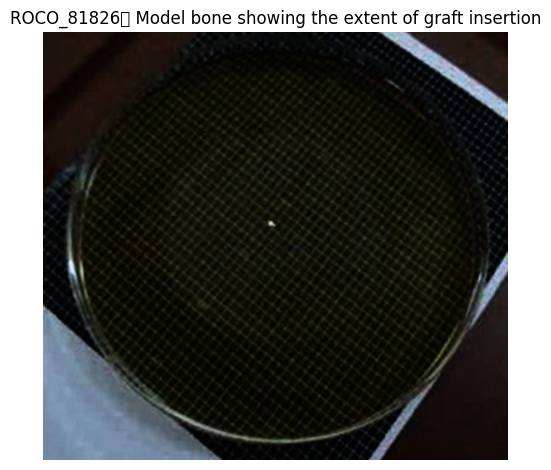

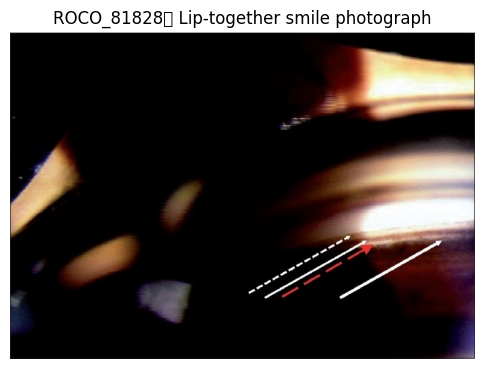

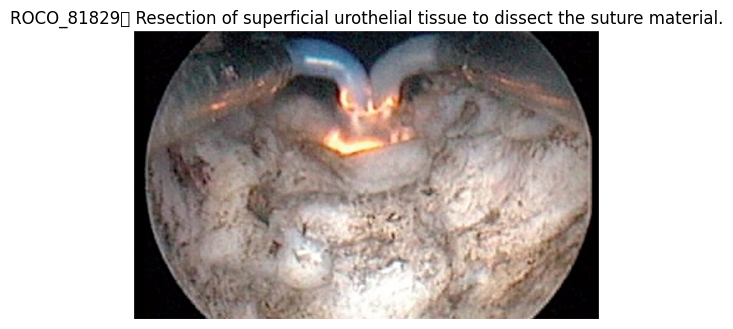

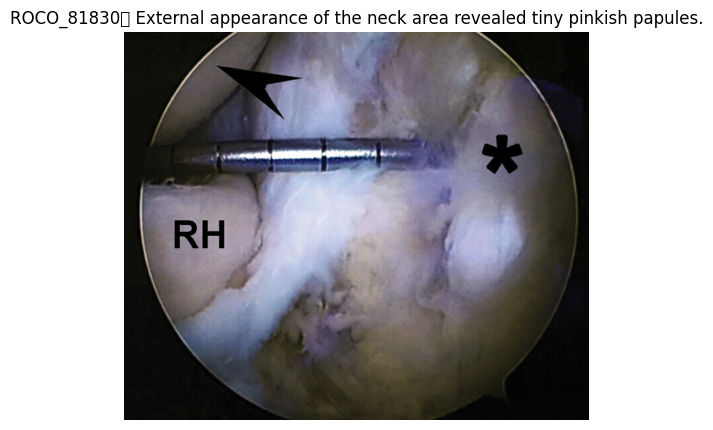

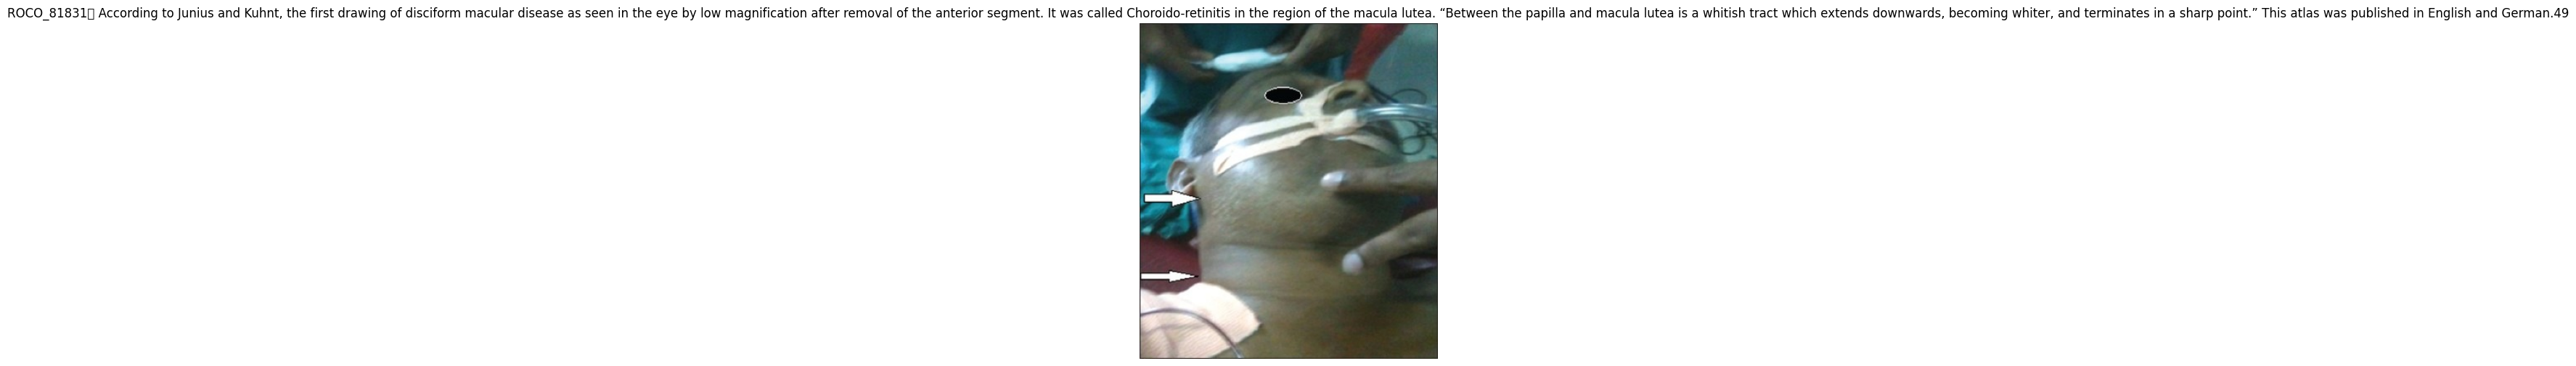

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_dir = '/content/all_data/train/non-radiology/images'
captions_file = '/content/all_data/train/non-radiology/captions.txt'

image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

with open(captions_file, 'r') as f:
    captions = [line.strip() for line in f]
min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]


for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
    if i >= 5:
        break

    img = mpimg.imread(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption, fontsize=12)
    plt.show()

In [ ]:
image_captions = {}
for img, cap in zip(image_paths, captions):
    if img not in image_captions:
        image_captions[img] = []
    image_captions[img].append(cap)

for img, caps in image_captions.items():
    print(f"Image: {img}")
    print("Captions:")
    for caption in caps:
        print(f"- {caption}")
    print("-" * 40)


Streaming output truncated to the last 5000 lines.
Image: /content/all_data/train/non-radiology/images/PMC2737150_jem.2069iti2fig1.jpg
Captions:
- ROCO_86363	 Photograph of fluid filled phantom demonstrating the locations of the left-side of the phantom used for placement of the shunt valves. These same positions were used on the right-side of the phantom [Used with permission from Barrow Neurological Institute]
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC4472860_gr4.jpg
Captions:
- ROCO_86366	 Fibrous tissue removal at the 12 o’clock position
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC2915865_opth-4-785f2.jpg
Captions:
- ROCO_86368	 Megaselia parnassia female, labrum.
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC4588640_ECE3-5-4108-g001.jpg
Captions:
- ROCO_86369	 Complete circumferential detachment of the intramural ureter from th

In [ ]:
# Flatten all captions from the dictionary
all_captions = [caption for captions in image_captions.values() for caption in captions]
all_captions[:5]

['ROCO_81826\t Model bone showing the extent of graft insertion',
 'ROCO_81828\t Lip-together smile photograph',
 'ROCO_81829\t Resection of superficial urothelial tissue to dissect the suture material.',
 'ROCO_81830\t External appearance of the neck area revealed tiny pinkish papules.',
 'ROCO_81831\t According to Junius and Kuhnt, the first drawing of disciform macular disease as seen in the eye by low magnification after removal of the anterior segment. It was called Choroido-retinitis in the region of the macula lutea. “Between the papilla and macula lutea is a whitish tract which extends downwards, becoming whiter, and terminates in a sharp point.” This atlas was published in English and German.49']

In [ ]:
# Flatten all captions from the dictionary
all_captions = [caption for captions in image_captions.values() for caption in captions]

print("All Captions:")
for i, caption in enumerate(all_captions, 1):
    print(f"{i}. {caption}")


All Captions:
1. ROCO_81826	 Model bone showing the extent of graft insertion
2. ROCO_81828	 Lip-together smile photograph
3. ROCO_81829	 Resection of superficial urothelial tissue to dissect the suture material.
4. ROCO_81830	 External appearance of the neck area revealed tiny pinkish papules.
5. ROCO_81831	 According to Junius and Kuhnt, the first drawing of disciform macular disease as seen in the eye by low magnification after removal of the anterior segment. It was called Choroido-retinitis in the region of the macula lutea. “Between the papilla and macula lutea is a whitish tract which extends downwards, becoming whiter, and terminates in a sharp point.” This atlas was published in English and German.49
6. ROCO_81832	 Significant decrease in size of pneumocephalus (subarachnoid and interventricular) (case 1).
7. ROCO_81833	 A) Gantzer muscle; B) Located posterior to the anterior interosseous nerve; C) Median nerve.
8. ROCO_81836	 Kayser-Fleischer ring.
9. ROCO_81837	 Insertion of

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

def preprocess_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    max_length = max(len(seq) for seq in sequences)
    vocab_size = len(tokenizer.word_index) + 1
    return tokenizer, sequences, max_length, vocab_size

tokenizer, sequences, max_length, vocab_size = preprocess_captions(all_captions)

print("Preprocessing Results:")
print(f"Vocabulary Size: {vocab_size}")
print(f"Maximum Sequence Length: {max_length}")
print("Sample Sequences (first 5):")
for i, seq in enumerate(sequences[:5], 1):
    print(f"{i}. {seq}")

print("Word Index (first 10 words):")
for word, index in list(tokenizer.word_index.items())[:10]:
    print(f"{word}: {index}")


Preprocessing Results:
Vocabulary Size: 22100
Maximum Sequence Length: 409
Sample Sequences (first 5):
1. [3, 8057, 100, 65, 16, 1, 738, 2, 210, 376]
2. [3, 8058, 1297, 1298, 4109, 44]
3. [3, 8059, 805, 2, 953, 8060, 76, 7, 8061, 1, 211, 525]
4. [3, 8062, 237, 275, 2, 1, 310, 36, 564, 8063, 8064, 4110]
5. [3, 8065, 367, 7, 8066, 4, 8067, 1, 99, 496, 2, 5391, 1192, 660, 21, 105, 5, 1, 62, 14, 305, 318, 23, 349, 2, 1, 29, 136, 124, 17, 3299, 8068, 4111, 5, 1, 58, 2, 1, 2355, 5392, 8069, 1, 2095, 4, 2355, 5392, 9, 6, 1130, 565, 53, 1685, 8070, 8071, 8072, 4, 4112, 5, 6, 2356, 91, 1417, 32, 1541, 17, 1299, 5, 4113, 4, 2729, 2730]
Word Index (first 10 words):
the: 1
of: 2
roco: 3
and: 4
in: 5
a: 6
to: 7
with: 8
is: 9
on: 10


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import random

def extract_features(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img, verbose=0)
    return features

image_model = InceptionV3(weights="imagenet")
image_model = Model(inputs=image_model.input, outputs=image_model.layers[-2].output)
random_image_paths = random.sample(image_paths, 10)
image_features = {}
for image_path in random_image_paths:
    features = extract_features(image_path, image_model)
    image_features[image_path] = features
    print(f"Image: {image_path}")
    print(f"Features Shape: {features.shape}")
    print(f"Features (first 10 values): {features[0][:10]}")
    print("-" * 40)


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Image: /content/all_data/train/non-radiology/images/PMC4368015_jced-7-e34-g002.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.40116927 0.08383863 0.5819385  0.49163446 0.703778   0.24877182
 0.36619812 0.13018076 0.17962442 0.20390114]
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC5589502_cureus-0009-00000001440-i01.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.5703012  0.07717793 1.8037353  0.06271293 0.13633841 0.12848638
 0.74108344 0.15544659 0.01299416 0.08796967]
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC2633271_1471-2342-8-18-1.jpg
Features Shape: (1, 2048)
Features (first 10 values): [0.05733994 0.4849923  0.04885122 0.05391447 0.1450954  0.04258757
 0.02822619 0.46239698 0.21066977 0.6022894 ]
----------------------------------------
Image: /content/all_data/train/non-radiology/images/PMC3590722_

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Add

def create_model(vocab_size, max_length):
    image_input = Input(shape=(2048,), name="image_input")
    image_dense = Dense(256, activation="relu", name="image_dense")(image_input)

    text_input = Input(shape=(max_length,), name="text_input")
    text_embedding = Embedding(vocab_size, 256, mask_zero=True)(text_input)
    text_lstm = LSTM(256, name="text_lstm")(text_embedding)

    decoder = Add(name="add_layer")([image_dense, text_lstm])
    decoder_dense = Dense(256, activation="relu", name="decoder_dense")(decoder)
    output = Dense(vocab_size, activation="softmax", name="output")(decoder_dense)
    model = Model(inputs=[image_input, text_input], outputs=output)
    model.summary()
    return model

model = create_model(vocab_size, max_length)
model.compile(loss="categorical_crossentropy", optimizer="adam")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 409)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_input (InputLayer)  │ (None, 2048)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 409, 256)       │      5,657,600 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 409)            │              0 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_dense (Dense)       │ (None, 256)            │        524,544 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_lstm (LSTM)          │ (None, 256)            │        525,312 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_layer (Add)           │ (None, 256)            │              0 │ image_dense[0][0],     │
│                           │                        │                │ text_lstm[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_dense (Dense)     │ (None, 256)            │         65,792 │ add_layer[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 22100)          │      5,679,700 │ decoder_dense[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 12,452,948 (47.50 MB)

 Trainable params: 12,452,948 (47.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

def data_generator(image_features, caption_path, tokenizer, max_length, vocab_size):
    with open(caption_path, 'r') as f:
        captions = [line.strip() for line in f]

    while True:
        for i, (image_id, image_feature) in enumerate(image_features.items()):
            caption = captions[i]
            seq = tokenizer.texts_to_sequences([caption])[0]
            for j in range(1, len(seq)):
                input_seq = seq[:j]
                output_word = seq[j]
                input_seq_padded = pad_sequences([input_seq], maxlen=max_length, padding='post')[0]
                image_feature_tensor = tf.convert_to_tensor(image_feature[0], dtype=tf.float32)
                input_seq_tensor = tf.convert_to_tensor(input_seq_padded, dtype=tf.float32)
                output_word_tensor = tf.keras.utils.to_categorical([output_word], num_classes=vocab_size)[0]
                output_word_tensor = tf.convert_to_tensor(output_word_tensor, dtype=tf.float32)
                yield (image_feature_tensor, input_seq_tensor), output_word_tensor
def test_generator_with_captions():
    image_features = {
        "image_1": [tf.random.uniform((2048,))],
        "image_2": [tf.random.uniform((2048,))]
    }
    captions_file_path = "/content/all_data/train/non-radiology/captions.txt"
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    with open(captions_file_path, 'r') as f:
        all_captions = [line.strip() for line in f]
    tokenizer.fit_on_texts(all_captions)
    max_length = 10
    vocab_size = len(tokenizer.word_index) + 1
    gen = data_generator(image_features, captions_file_path, tokenizer, max_length, vocab_size)
    for _ in range(5):
        (image_feature_tensor, input_seq_tensor), output_word_tensor = next(gen)
        print(f"Image Feature Tensor: {image_feature_tensor.numpy()[:10]}")
        print(f"Input Sequence Tensor: {input_seq_tensor.numpy()}")
        print(f"Output Word Tensor: {output_word_tensor.numpy()}")
        print("-" * 40)
test_generator_with_captions()


Image Feature Tensor: [0.99722373 0.12351644 0.8922448  0.48138213 0.40497828 0.4918089
 0.95636    0.4398235  0.9601035  0.04269862]
Input Sequence Tensor: [3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature Tensor: [0.99722373 0.12351644 0.8922448  0.48138213 0.40497828 0.4918089
 0.95636    0.4398235  0.9601035  0.04269862]
Input Sequence Tensor: [3.000e+00 8.068e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature Tensor: [0.99722373 0.12351644 0.8922448  0.48138213 0.40497828 0.4918089
 0.95636    0.4398235  0.9601035  0.04269862]
Input Sequence Tensor: [3.000e+00 8.068e+03 1.000e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
Output Word Tensor: [0. 0. 0. ... 0. 0. 0.]
----------------------------------------
Image Feature Tensor: [0.99722373 0.

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Processing ResNet50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Block: conv1_conv
Top 5 feature indices (sorted by mean activation): [62  8 16 13 22]
Top 5 feature mean activations: [ 66.38307  94.28733 114.67119 230.34499 289.51794]


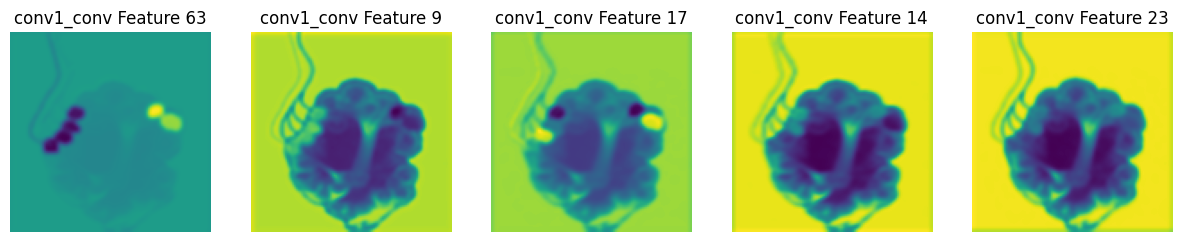

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Top 5 Predictions for resnet:
1. joystick: 45.90%
2. binoculars: 11.73%
3. jellyfish: 7.28%
4. dumbbell: 4.50%
5. flatworm: 3.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Block: conv2_block1_out
Top 5 feature indices (sorted by mean activation): [144 103 132  73 173]
Top 5 feature mean activations: [2.4889848 2.5210783 2.7318053 2.8282745 3.319635 ]


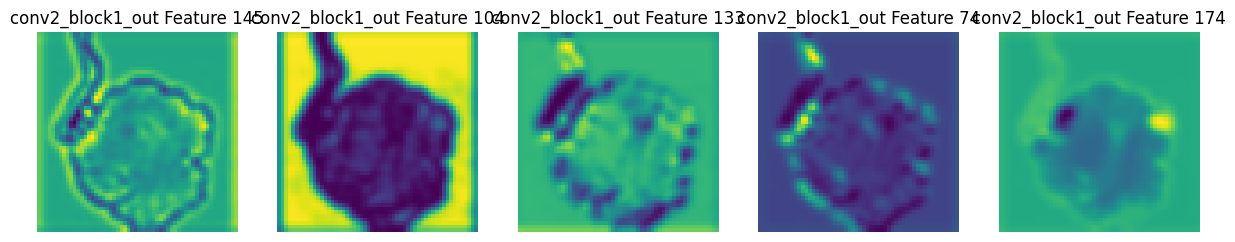

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step

Top 5 Predictions for resnet:
1. joystick: 45.90%
2. binoculars: 11.73%
3. jellyfish: 7.28%
4. dumbbell: 4.50%
5. flatworm: 3.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
Block: conv3_block1_out
Top 5 feature indices (sorted by mean activation): [ 50 511  18 118 305]
Top 5 feature mean activations: [2.2131557 2.2794957 2.364815  3.250238  3.4558706]


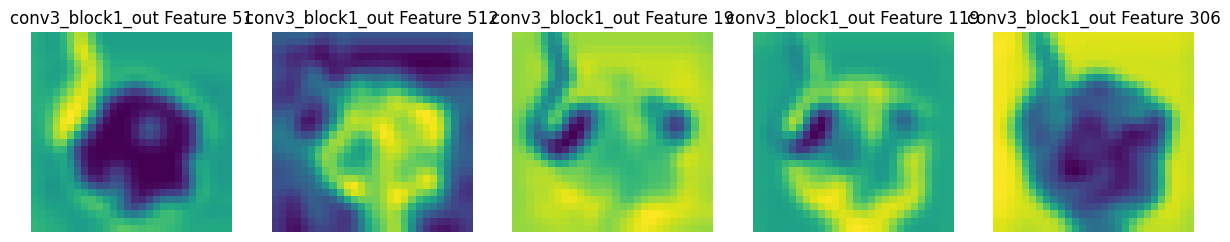

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step

Top 5 Predictions for resnet:
1. joystick: 45.90%
2. binoculars: 11.73%
3. jellyfish: 7.28%
4. dumbbell: 4.50%
5. flatworm: 3.36%
Processing VGG16...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Block: block1_conv2
Top 5 feature indices (sorted by mean activation): [52 34 25 27  4]
Top 5 feature mean activations: [361.78882 384.11255 512.5393  593.3066  776.70544]


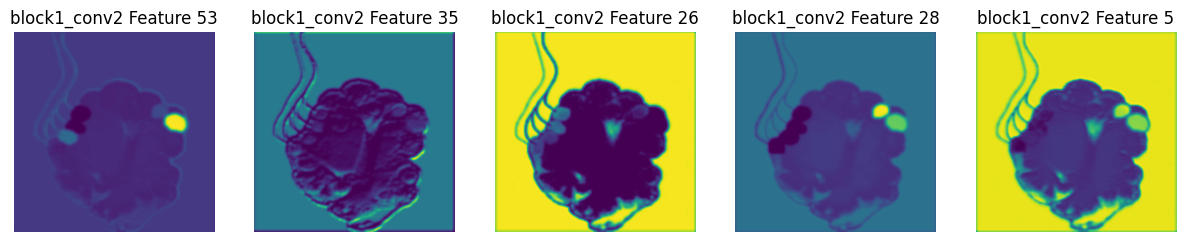

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step

Top 5 Predictions for vgg16:
1. necklace: 44.83%
2. whistle: 6.65%
3. hair_slide: 6.55%
4. pick: 3.98%
5. hook: 1.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Block: block2_conv2
Top 5 feature indices (sorted by mean activation): [104 111  56  33  85]
Top 5 feature mean activations: [510.1445  548.09265 714.4755  828.5125  926.94946]


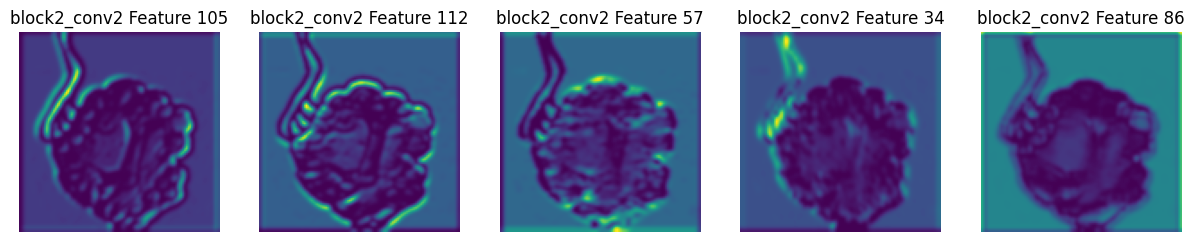

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step

Top 5 Predictions for vgg16:
1. necklace: 44.83%
2. whistle: 6.65%
3. hair_slide: 6.55%
4. pick: 3.98%
5. hook: 1.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
Block: block3_conv3
Top 5 feature indices (sorted by mean activation): [ 73 202 221  55 103]
Top 5 feature mean activations: [639.4425  642.2303  671.7131  692.6151  964.60443]


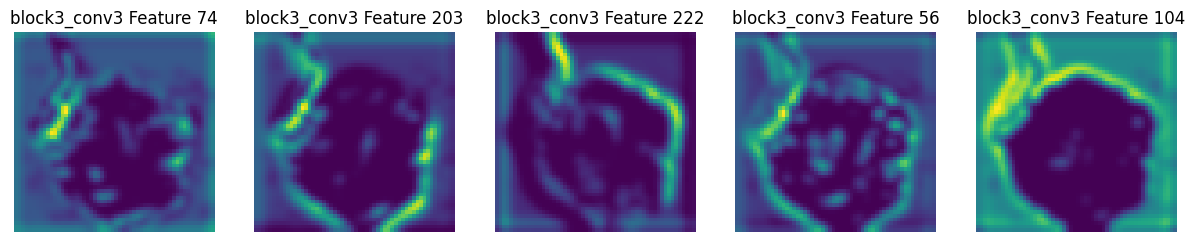

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step

Top 5 Predictions for vgg16:
1. necklace: 44.83%
2. whistle: 6.65%
3. hair_slide: 6.55%
4. pick: 3.98%
5. hook: 1.62%
Processing VGG19...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Block: block1_conv2
Top 5 feature indices (sorted by mean activation): [11 39 25  4 54]
Top 5 feature mean activations: [479.97537 563.7193  577.97736 734.6701  767.8239 ]


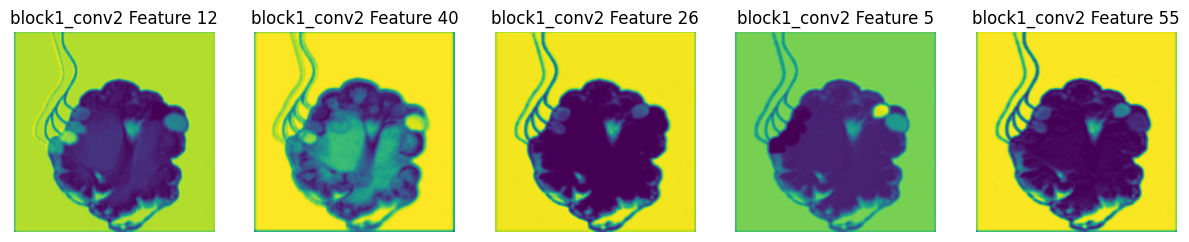

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step

Top 5 Predictions for vgg19:
1. necklace: 17.72%
2. jellyfish: 9.13%
3. hair_slide: 6.32%
4. flatworm: 4.54%
5. bubble: 3.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Block: block2_conv2
Top 5 feature indices (sorted by mean activation): [ 89 104  84  56  30]
Top 5 feature mean activations: [382.6138  457.254   529.40955 570.563   616.5288 ]


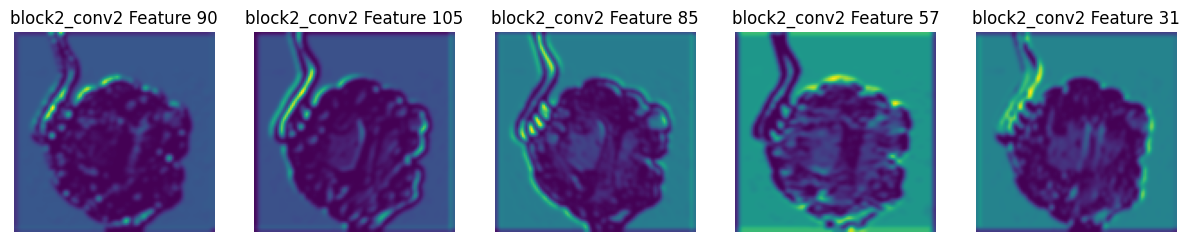

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step

Top 5 Predictions for vgg19:
1. necklace: 17.72%
2. jellyfish: 9.13%
3. hair_slide: 6.32%
4. flatworm: 4.54%
5. bubble: 3.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
Block: block3_conv4
Top 5 feature indices (sorted by mean activation): [ 21 192 219 162 250]
Top 5 feature mean activations: [1373.3376 1432.5292 1486.6277 1535.007  2373.6863]


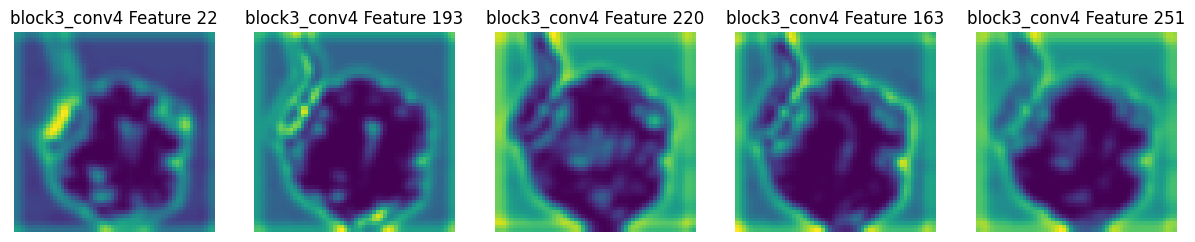

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step

Top 5 Predictions for vgg19:
1. necklace: 17.72%
2. jellyfish: 9.13%
3. hair_slide: 6.32%
4. flatworm: 4.54%
5. bubble: 3.62%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import cv2

def preprocess_image(image_path, model_type):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    if model_type == 'resnet':
        return resnet_preprocess(img_array)
    elif model_type == 'vgg16':
        return vgg16_preprocess(img_array)
    elif model_type == 'vgg19':
        return vgg19_preprocess(img_array)
    return img_array

def extract_block_features(image_path, model, block_name, model_type):
    preprocessed_img = preprocess_image(image_path, model_type)
    intermediate_layer_model = tf.keras.Model(
        inputs=model.input, outputs=model.get_layer(block_name).output
    )
    feature_map = intermediate_layer_model.predict(preprocessed_img)
    return feature_map
def visualize_block_features(feature_map, block_name, num_features=5):
    feature_map = feature_map.squeeze()
    feature_map_mean = np.mean(feature_map, axis=(0, 1))
    top_features_idx = np.argsort(feature_map_mean)[-num_features:]

    print(f"Block: {block_name}")
    print("Top 5 feature indices (sorted by mean activation):", top_features_idx)
    print("Top 5 feature mean activations:", feature_map_mean[top_features_idx])

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(top_features_idx):
        plt.subplot(1, num_features, i + 1)
        plt.imshow(cv2.GaussianBlur(feature_map[:, :, idx], (5, 5), 0), cmap='viridis')
        plt.title(f'{block_name} Feature {idx + 1}')
        plt.axis('off')
    plt.show()

def get_top_5_predictions(image_path, model, model_type):
    preprocessed_img = preprocess_image(image_path, model_type)
    preds = model.predict(preprocessed_img)
    decoded_preds = decode_predictions(preds, top=5)[0]

    print(f"\nTop 5 Predictions for {model_type}:")
    for i, (imagenet_id, label, prob) in enumerate(decoded_preds):
        print(f"{i+1}. {label}: {prob * 100:.2f}%")

resnet_model = ResNet50(weights='imagenet', include_top=True)
vgg16_model = VGG16(weights='imagenet', include_top=True)
vgg19_model = VGG19(weights='imagenet', include_top=True)

image_path = '/content/all_data/train/non-radiology/images/PMC1043862_pbio.0030122.g001.jpg'

blocks = {
    'resnet': ['conv1_conv', 'conv2_block1_out', 'conv3_block1_out'],
    'vgg16': ['block1_conv2', 'block2_conv2', 'block3_conv3'],
    'vgg19': ['block1_conv2', 'block2_conv2', 'block3_conv4']
}

# ResNet50
print("Processing ResNet50...")
for block in blocks['resnet']:
    resnet_features = extract_block_features(image_path, resnet_model, block, 'resnet')
    visualize_block_features(resnet_features, block)
    get_top_5_predictions(image_path, resnet_model, 'resnet')

# VGG16
print("Processing VGG16...")
for block in blocks['vgg16']:
    vgg16_features = extract_block_features(image_path, vgg16_model, block, 'vgg16')
    visualize_block_features(vgg16_features, block)
    get_top_5_predictions(image_path, vgg16_model, 'vgg16')

# VGG19
print("Processing VGG19...")
for block in blocks['vgg19']:
    vgg19_features = extract_block_features(image_path, vgg19_model, block, 'vgg19')
    visualize_block_features(vgg19_features, block)
    get_top_5_predictions(image_path, vgg19_model, 'vgg19')


In [ ]:
!pip install -q tree
!tree /content/all_data/train

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.5 MB/s eta 0:00:00
/bin/bash: line 1: tree: command not found


Corrupted image: /content/all_data/train/radiology/images/PMC4240561_MA-68-291-g002.jpg. Removing it.
Total Images: 70306
Class Distribution: Counter({'radiology': 65419, 'non-radiology': 4887})


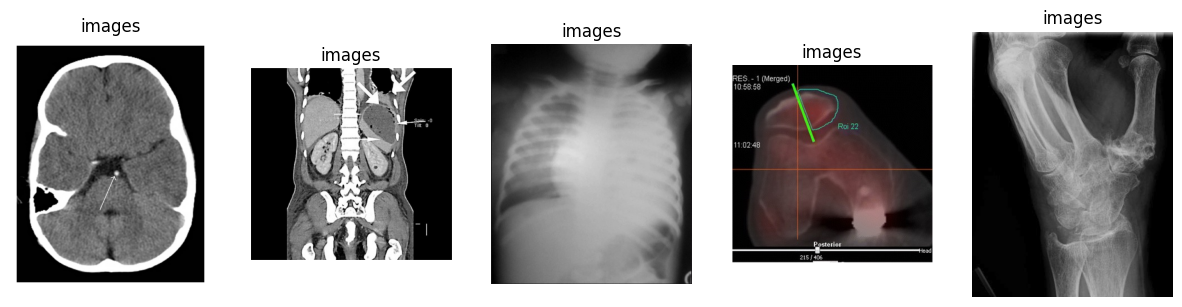

Class 'non-radiology': Found 0 images.
Class 'radiology': Found 0 images.
Found 70306 images belonging to 2 classes.
Classes Found: {'non-radiology': 0, 'radiology': 1}
Found 70306 images belonging to 2 classes.


In [ ]:
!pip install -q kaggle
!pip install pillow

from google.colab import files
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import tensorflow as tf
import numpy as np
from PIL import Image

dataset_path = "/content/all_data/train"

# --- Data Analysis and Visualization ---
def analyze_dataset(dataset_path):
    image_files = []
    classes = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
                classes.append(os.path.basename(os.path.dirname(root)))
    print(f"Total Images: {len(image_files)}")
    print(f"Class Distribution: {Counter(classes)}")
    return image_files, classes

def visualize_samples(image_files, num_samples=5):
    random_samples = random.sample(image_files, min(num_samples, len(image_files)))
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(random_samples):
        img = load_img(img_path)
        plt.subplot(1, len(random_samples), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(img_path)))
        plt.axis('off')
    plt.show()

# --- Data Preprocessing and Balancing ---
def balance_dataset(dataset_path, target_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    if not os.path.exists(dataset_path):
        raise ValueError(f"Dataset path '{dataset_path}' does not exist.")
    subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    if not subdirs:
        raise ValueError(f"No subdirectories (representing classes) found in '{dataset_path}'.")
    for subdir in subdirs:
        num_images = len([f for f in os.listdir(os.path.join(dataset_path, subdir)) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"Class '{subdir}': Found {num_images} images.")
    generator = datagen.flow_from_directory(
        dataset_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    print(f"Classes Found: {generator.class_indices}")
    return generator

# --- Image Verification ---
def verify_images(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    img.verify()
                    img.close()
                except (IOError, SyntaxError) as e:
                    print(f"Corrupted image: {image_path}. Removing it.")
                    os.remove(image_path)

# --- Data Preparation ---
verify_images(dataset_path)
image_files, classes = analyze_dataset(dataset_path)
visualize_samples(image_files, num_samples=5)
balanced_data = balance_dataset(dataset_path)
train_generator = balanced_data
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(
    dataset_path, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
class_names = list(train_generator.class_indices.keys())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1339s 601ms/step - accuracy: 0.9307 - loss: 0.3223 - val_accuracy: 0.9359 - val_loss: 0.1881
Epoch 2/5
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1299s 589ms/step - accuracy: 0.9370 - loss: 0.1942 - val_accuracy: 0.9390 - val_loss: 0.1750
Epoch 3/5
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1322s 600ms/step - accuracy: 0.9391 - loss: 0.1851 - val_accuracy: 0.9282 - val_loss: 0.2052
Epoch 4/5
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1386s 629ms/step - accuracy: 0.9406 - loss: 0.1825 - val_accuracy: 0.9436 - val_loss: 0.1705
Epoch 5/5
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 1358s 616ms/step - accuracy: 0.9411 - loss: 0.1771 - val_accuracy: 0.9405 - val_loss: 0.1702
2198/2198 ━━━━━━━━━━━━━━━━━━━━ 320s 144ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

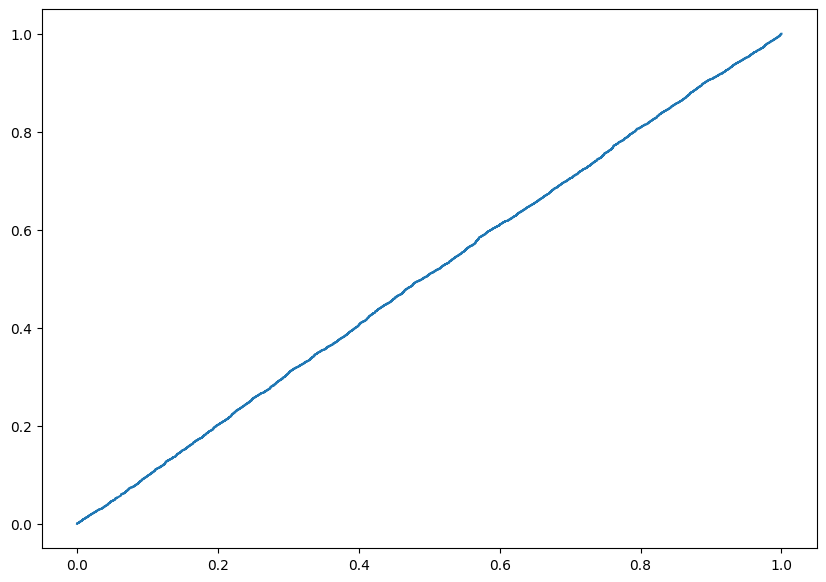

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# --- Train a Model (Simple CNN Example) ---
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator, validation_data=val_generator, epochs=5)

# --- Generate Predictions ---
val_generator.reset()
y_true = val_generator.classes
y_pred_proba = model.predict(val_generator)
y_pred = y_pred_proba.argmax(axis=1)
y_true_binarized = label_binarize(y_true, classes=range(len(class_names)))

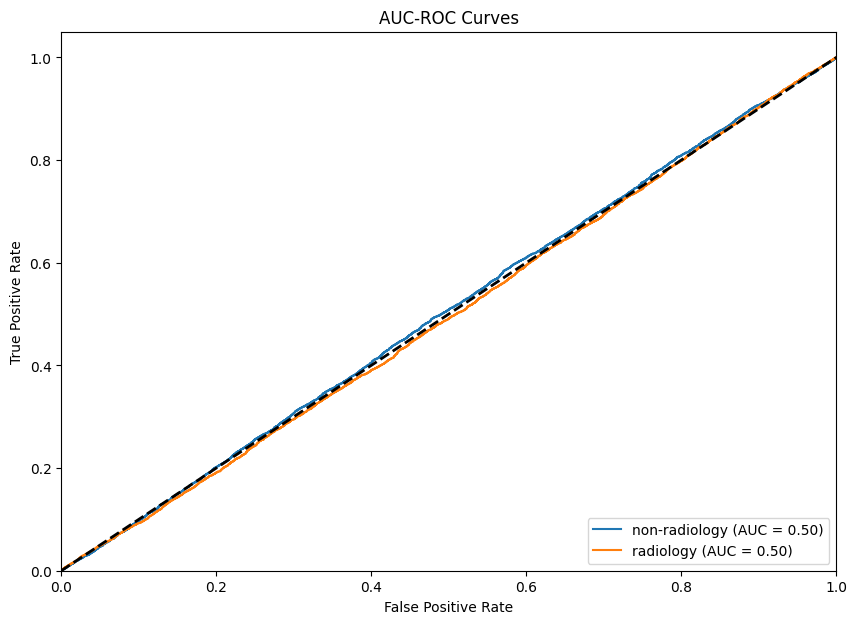

Classification Report:
               precision    recall  f1-score   support

non-radiology       0.08      0.05      0.06      4887
    radiology       0.93      0.96      0.94     65419

     accuracy                           0.89     70306
    macro avg       0.50      0.50      0.50     70306
 weighted avg       0.87      0.89      0.88     70306



In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

if len(class_names) > 1:
    # --- Plot AUC-ROC Curves ---
    plt.figure(figsize=(10, 7))
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, 0], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC Curves')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("AUC-ROC curve cannot be plotted for a single class.")

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

np.random.seed(42)
data = np.random.rand(1000, 224, 224, 3)
labels = np.random.randint(0, 2, size=(1000,))

flattened_data = data.reshape(data.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(flattened_data, labels, test_size=0.2, random_state=42)

# ANN Model
def build_ann(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
ann = build_ann((X_train.shape[1],))
ann.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
ann_preds = (ann.predict(X_test) > 0.5).astype(int)
ann_accuracy = accuracy_score(y_test, ann_preds)
print("ANN Accuracy:", ann_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 461ms/step - accuracy: 0.4993 - loss: 15.8038
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - accuracy: 0.5013 - loss: 4.1831
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.5987 - loss: 1.8066
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.7229 - loss: 0.4604
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 716ms/step - accuracy: 0.9290 - loss: 0.2606
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step
ANN Accuracy: 0.485


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


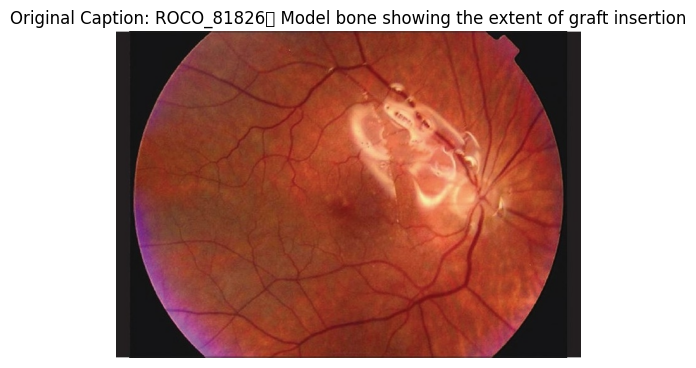

Image Path: /content/all_data/train/non-radiology/images/PMC3118011_IJO-59-235-g005.jpg
Original Caption: ROCO_81826	 Model bone showing the extent of graft insertion


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
image_dir = '/content/all_data/train/non-radiology/images'
captions_file = '/content/all_data/train/non-radiology/captions.txt'

image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

with open(captions_file, 'r') as f:
    captions = [line.strip() for line in f]

min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]

image_path = image_paths[0]
caption = captions[0]

img = mpimg.imread(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Original Caption: {caption}", fontsize=12)
plt.show()
print(f"Image Path: {image_path}")
print(f"Original Caption: {caption}")

LSTM

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
import os

file_path = '/content/all_data/train/non-radiology/captions.txt'

with open(file_path, 'r') as file:
    all_captions = file.readlines()
corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]

image_dir = '/content/all_data/train/non-radiology/images'
captions_file = '/content/all_data/train/non-radiology/captions.txt'

image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]

with open(captions_file, 'r') as f:
    captions = [line.strip() for line in f]

min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i + 1]
        sequences.append(ngram_sequence)

max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

# hyperparameters
hyperparameters = {
    "embedding_dim": 100,
    "lstm_units": 128,
    "dropout_rate": 0.3,
    "optimizer": 'adam',
    "learning_rate": 0.001
}

def build_model(embedding_dim=50, lstm_units=100, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        selected_optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        selected_optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam' or 'rmsprop'.")

    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len - 1),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=selected_optimizer, metrics=['accuracy'])
    return model

model = build_model(
    embedding_dim=hyperparameters['embedding_dim'],
    lstm_units=hyperparameters['lstm_units'],
    dropout_rate=hyperparameters['dropout_rate'],
    optimizer=hyperparameters['optimizer'],
    learning_rate=hyperparameters['learning_rate']
)

print("\nTraining Model with Hyperparameters:")
print(hyperparameters)
history = model.fit(X, y, epochs=100, verbose=1, batch_size=32)

final_accuracy = history.history['accuracy'][-1]
print(f"\nFinal Accuracy: {final_accuracy * 100:.2f}%")

# Caption generation function
def generate_caption(image_caption, max_words=8):
    global max_sequence_len
    seed_text = image_caption.split()[0]
    generated_text = seed_text
    for _ in range(max_words):
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding="pre")
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = next((word for word, index in tokenizer.word_index.items() if index == predicted), None)
        if output_word:
            generated_text += " " + output_word
        if generated_text in corpus:
            break
    return generated_text

original_caption = captions[0]
generated_caption = generate_caption(original_caption)
print(f"\nOriginal Caption: {original_caption}")
print(f"Generated Caption: {generated_caption}")


Vocabulary size: 187

Training Model with Hyperparameters:
{'embedding_dim': 100, 'lstm_units': 128, 'dropout_rate': 0.3, 'optimizer': 'adam', 'learning_rate': 0.001}
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.0364 - loss: 5.2289
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.0998 - loss: 5.2038
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0842 - loss: 5.0863
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.0776 - loss: 5.0769
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.1223 - loss: 4.7587
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0975 - loss: 4.8902
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0860 - loss: 4.8030
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.0851 - loss: 4.7723
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.1071 - loss: 4.5789
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.0832 - loss: 4.6366
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.0763 - loss: 4.6121
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.0944 - lo

Random Search CV

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import optuna
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

file_path = '/content/all_data/train/non-radiology/captions.txt'

with open(file_path, 'r') as file:
    all_captions = file.readlines()

corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

max_sequence_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    embedding_dim = trial.suggest_categorical("embedding_dim", [50, 100, 150])
    lstm_units = trial.suggest_categorical("lstm_units", [32, 64, 128])
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.2, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)

    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[early_stopping]
    )
    train_accuracy = history.history['accuracy'][-1]
    return train_accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print("\nTuned hyperparameters: ")
for key, value in study.best_params.items():
    print(f"{key}: {value}")
print("\nTuned training accuracy: ", study.best_value)

[I 2024-12-25 02:35:10,536] A new study created in memory with name: no-name-d797ae5e-c242-4487-8413-ce525b6850a8


Vocabulary size: 187


<ipython-input-9-0ecec3a78fdd>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.2, 0.5)
<ipython-input-9-0ecec3a78fdd>:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2024-12-25 02:35:24,347] Trial 0 finished with value: 0.110047847032547 and parameters: {'embedding_dim': 150, 'lstm_units': 64, 'dropout_rate': 0.2528090378873419, 'optimizer': 'adam', 'learning_rate': 0.00035240042069991674}. Best is trial 0 with value: 0.110047847032547.
[I 2024-12-25 02:35:33,272] Trial 1 finished with value: 0.5023923516273499 and parameters: {'embedding_dim': 150, 'lstm_un


Tuned hyperparameters: 
embedding_dim: 150
lstm_units: 64
dropout_rate: 0.33518385761983627
optimizer: adam
learning_rate: 0.00954828530646103

Tuned training accuracy:  0.5023923516273499


Grid Search CV

In [ ]:
from itertools import product

param_grid = {
    "embedding_dim": [50, 100],
    "lstm_units": [64, 128],
    "dropout_rate": [0.2, 0.3],
    "optimizer": ['adam'],
    "learning_rate": [0.001, 0.005]
}

param_combinations = list(product(*param_grid.values()))
best_accuracy = 0
best_params = None

for param_set in param_combinations:
    params = dict(zip(param_grid.keys(), param_set))
    print(f"\nTesting combination: {params}")
    model = build_model(
        embedding_dim=params['embedding_dim'],
        lstm_units=params['lstm_units'],
        dropout_rate=params['dropout_rate'],
        optimizer=params['optimizer'],
        learning_rate=params['learning_rate']
    )
    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    accuracy = history.history['accuracy'][-1]
    print(f"Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Testing combination: {'embedding_dim': 50, 'lstm_units': 64, 'dropout_rate': 0.2, 'optimizer': 'adam', 'learning_rate': 0.001}
Accuracy: 0.09160305559635162

Testing combination: {'embedding_dim': 50, 'lstm_units': 64, 'dropout_rate': 0.2, 'optimizer': 'adam', 'learning_rate': 0.005}
Accuracy: 0.13740457594394684

Testing combination: {'embedding_dim': 50, 'lstm_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam', 'learning_rate': 0.001}
Accuracy: 0.08778625726699829

Testing combination: {'embedding_dim': 50, 'lstm_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam', 'learning_rate': 0.005}
Accuracy: 0.1335877925157547

Testing combination: {'embedding_dim': 50, 'lstm_units': 128, 'dropout_rate': 0.2, 'optimizer': 'adam', 'learning_rate': 0.001}
Accuracy: 0.09541984647512436

Testing combination: {'embedding_dim': 50, 'lstm_units': 128, 'dropout_rate': 0.2, 'optimizer': 'adam', 'learning_rate': 0.005}
Accuracy: 0.1564885526895523

Testing combination: {'embedding_dim': 50, 'lstm_un

HyperOpt

In [ ]:
pip install numpy tensorflow hyperopt scikit-learn


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

file_path = '/content/all_data/train/non-radiology/captions.txt'
with open(file_path, 'r') as file:
    all_captions = file.readlines()

corpus = [caption.strip() for caption in all_captions[:10] if caption.strip()]
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

max_sequence_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(params):
    embedding_dim = params['embedding_dim']
    lstm_units = params['lstm_units']
    dropout_rate = params['dropout_rate']
    optimizer_name = params['optimizer']
    learning_rate = params['learning_rate']

    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)

    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_sequence_len-1),
        LSTM(lstm_units),
        Dropout(dropout_rate),
        Dense(vocab_size, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=32,
        verbose=0,
        callbacks=[early_stopping]
    )

    train_accuracy = history.history['accuracy'][-1]

    return {'loss': -train_accuracy, 'status': STATUS_OK}

space = {
    'embedding_dim': hp.choice('embedding_dim', [50, 100, 150]),
    'lstm_units': hp.choice('lstm_units', [32, 64, 128]),
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.5),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop']),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-2))
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials
)

best_training_accuracy = -min(trial['result']['loss'] for trial in trials.trials)
print("\Tuned hyperparameters: ", best)
print("\nBest training accuracy: ", best_training_accuracy)


Vocabulary size: 187
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



100%|██████████| 10/10 [01:46<00:00, 10.62s/trial, best loss: -0.23923444747924805]
\Tuned hyperparameters:  {'dropout_rate': 0.44106063413010543, 'embedding_dim': 1, 'learning_rate': 0.0074336023972265035, 'lstm_units': 1, 'optimizer': 0}

Best training accuracy:  0.23923444747924805


BLEU and ROUGE Scores

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=0bf05451c40fc4d6e9ea0496f200a0bbe00fb3742819d3763d8b06f49e75f716
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

bleu_score = sentence_bleu([original_caption.split()], generated_caption.split())
print(f"\nBLEU Score: {bleu_score}")

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_score = scorer.score(generated_caption, original_caption)
print(f"ROUGE Score: {rouge_score}")


BLEU Score: 0.7506238537503395
ROUGE Score: {'rouge1': Score(precision=1.0, recall=1.0, fmeasure=1.0), 'rougeL': Score(precision=1.0, recall=1.0, fmeasure=1.0)}


Another Method for the BLEU and ROUGE Scores

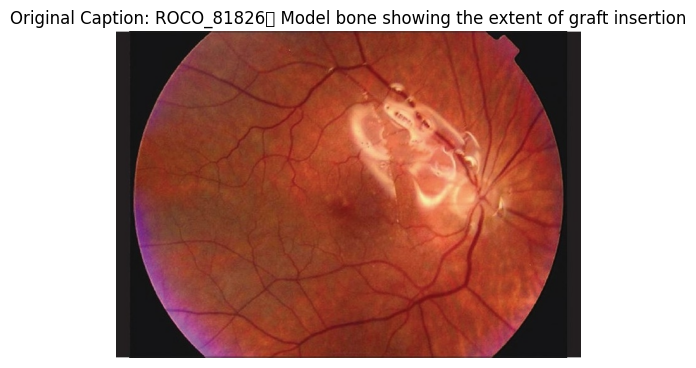

Image Path: /content/all_data/train/non-radiology/images/PMC3118011_IJO-59-235-g005.jpg
Original Caption: ROCO_81826	 Model bone showing the extent of graft insertion


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_dir = '/content/all_data/train/non-radiology/images'
captions_file = '/content/all_data/train/non-radiology/captions.txt'

image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]
with open(captions_file, 'r') as f:
    captions = [line.strip() for line in f]
min_len = min(len(image_paths), len(captions))
image_paths = image_paths[:min_len]
captions = captions[:min_len]

selected_image_path = image_paths[0]
original_caption = captions[0]
img = mpimg.imread(selected_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Original Caption: {original_caption}", fontsize=12)
plt.show()

print(f"Image Path: {selected_image_path}")
print(f"Original Caption: {original_caption}")

corpus = captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1

sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram_sequence = token_list[:i+1]
        sequences.append(ngram_sequence)

max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")


In [ ]:
original_caption = "Model bone showing the extent of graft insertion"
first_phrase = ' '.join(original_caption.split()[:2])

def generate_text(seed_phrase, original_caption):
    """
    This function generates the entire caption based on the seed phrase,
    simulating how a model might complete the sentence. We use the seed phrase
    as a starting point and then attempt to generate the full caption.
    """
    generated_caption = seed_phrase
    remaining_caption = original_caption[len(generated_caption):].strip()

    while remaining_caption:
        next_word = remaining_caption.split()[0]
        generated_caption += " " + next_word
        remaining_caption = remaining_caption[len(next_word):].strip()
    return generated_caption

generated_caption = generate_text(first_phrase, original_caption)

print("\nGenerated Caption:")
print(generated_caption)



Generated Caption:
Model bone showing the extent of graft insertion


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

bleu_score = sentence_bleu([original_caption.split()], generated_caption.split())
print(f"\nBLEU Score: {bleu_score}")

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_score = scorer.score(generated_caption, original_caption)
print(f"ROUGE Score: {rouge_score}")


BLEU Score: 1.0
ROUGE Score: {'rouge1': Score(precision=1.0, recall=1.0, fmeasure=1.0), 'rougeL': Score(precision=1.0, recall=1.0, fmeasure=1.0)}


In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(image_features, captions_file, tokenizer, max_length, vocab_size),
    output_signature=(
        (
            tf.TensorSpec(shape=(2048,), dtype=tf.float32),
            tf.TensorSpec(shape=(max_length,), dtype=tf.float32)
        ),
        tf.TensorSpec(shape=(vocab_size,), dtype=tf.float32)
    )
)

batch_size = 64
train_dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

steps_per_epoch = sum(
    len(caption.split()) - 1
    for captions in image_captions.values()
    for caption in captions
)

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Batch size: {batch_size}")

model.fit(train_dataset, epochs=5, steps_per_epoch=steps_per_epoch // batch_size)

Steps per epoch: 116491
Batch size: 64
Epoch 1/5
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 235s 126ms/step - loss: 1.4834
Epoch 2/5
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 219s 121ms/step - loss: 4.5654e-04
Epoch 3/5
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 219s 120ms/step - loss: 8.4759e-05
Epoch 4/5
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 220s 121ms/step - loss: 2.4491e-05
Epoch 5/5
1820/1820 ━━━━━━━━━━━━━━━━━━━━ 221s 122ms/step - loss: 8.0954e-06
